# Iris

El problema de clasificación Iris es un clásico en el ámbito del aprendizaje automático y se utiliza comúnmente como un ejemplo para ilustrar técnicas de clasificación. Este conjunto de datos contiene tres especies de flores Iris (Iris setosa, Iris versicolor e Iris virgínica), con un total de 150 muestras. Cada muestra está definida por cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: Adagrad
- Learning rate: 0.03
- Epochs :  1000
- Función de Activación : LeakyRelu
- Capas de la Red : 3
- Neuronas de cada capa : 4, 10 y 3

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from src.neural_network.utils.categorical import to_categorical

In [36]:
from src.neural_network.neural_network import train, predict, create_nn, test_nn
from src.neural_network.utils.draw_nn import draw_nn
from src.neural_network.layers.activation.functions import Relu, Tanh, LeakyRelu, Sigmoid
from src.neural_network.utils.graphics.regression import learning_curve, dispersion_graph
from src.neural_network.optimizers.sgd import SGD
from src.neural_network.optimizers.adam import Adam
from src.neural_network.optimizers.rmsprop import RMSProp
from src.neural_network.optimizers.adagrad import Adagrad
from src.neural_network.losses.cross_entropy import CrossEntropyLoss
from src.neural_network.losses.mse import MSELoss
from src.neural_network.utils.graphics.classification import display_confusion_matrix
from src.neural_network.optimizers.momentum import Momentum


In [37]:
X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


X_train = np.reshape(X_train, (112, 4, 1))
X_test = np.reshape(X_test, (38, 4, 1))

y_train = np.reshape(y_train, (112, 3, 1))
y_test = np.reshape(y_test, (38, 3, 1))

sample_df = pd.DataFrame(X_train[:, :, 0], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
sample_df['Class'] = np.argmax(y_train[:, :, 0], axis=1)

class_counts = sample_df['Class'].value_counts()
styled_table = sample_df.head(10).style.set_table_attributes('style="width:70%"').set_caption("Primeras 10 muestras")
styled_table = styled_table.set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '12pt'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '10pt'), ('text-align', 'center')]
}])

display(styled_table)
print("--------------------------------------------------")
print(class_counts)

,Feature1,Feature2,Feature3,Feature4,Class
0,6.100000,2.800000,4.000000,1.300000,1
1,5.500000,3.500000,1.300000,0.200000,0
2,6.500000,3.000000,5.800000,2.200000,2
3,6.100000,3.000000,4.600000,1.400000,1
4,4.800000,3.400000,1.600000,0.200000,0
5,6.700000,2.500000,5.800000,1.800000,2
6,5.100000,3.400000,1.500000,0.200000,0
7,6.500000,2.800000,4.600000,1.500000,1
8,7.900000,3.800000,6.400000,2.000000,2
9,4.800000,3.000000,1.400000,0.100000,0


--------------------------------------------------
1    41
0    36
2    35
Name: Class, dtype: int64


In [38]:
optimizers = [
    Adagrad(learning_rate=0.04),
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 10, 3], activation_function=activations, optimizers=optimizers)
train_loss = train(nn, loss, X_train, y_train, epochs=1000)

In [39]:
y_true, y_pred = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 100.0%


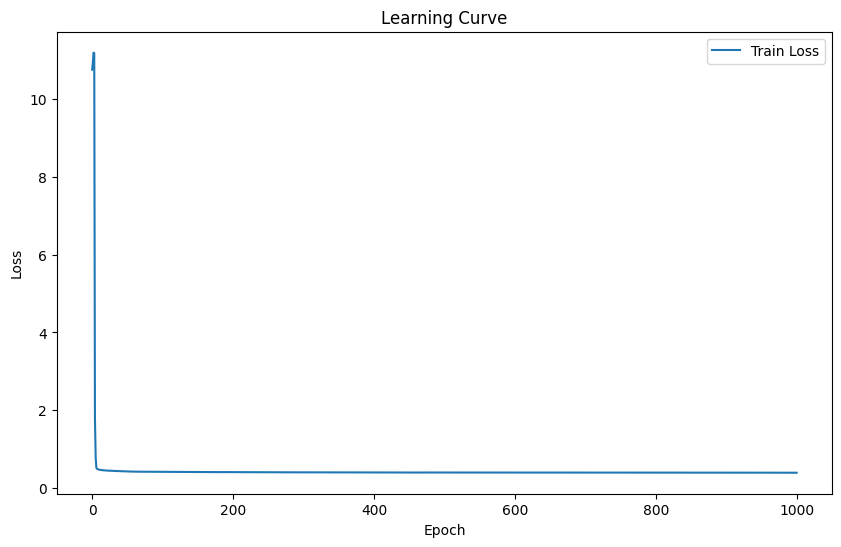

In [40]:
learning_curve(train_loss)

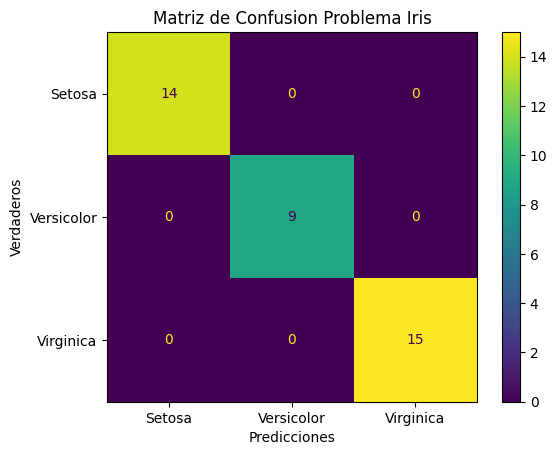

In [41]:
display_confusion_matrix(y_true, y_pred, ['Setosa', 'Versicolor', 'Virginica'], title='Matriz de Confusion Problema Iris')

# Experimentos Previos

### Test1

In [42]:
optimizers = [
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03)
]

activations = [Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 4, 3], activation_function=activations, optimizers=optimizers)

In [43]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [44]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 100.0%


### Test2

In [45]:
optimizers = [
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 8, 4, 3], activation_function=activations, optimizers=optimizers)

In [46]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [47]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 60.53%


### Test3

In [48]:

optimizers = [
    Momentum(learning_rate=0.01),
    Adagrad(learning_rate=0.02)
]

activations = [Sigmoid(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 3], activation_function=activations, optimizers=optimizers)

In [49]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [50]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 100.0%


### Test4

In [51]:
optimizers = [
    Adagrad(learning_rate=0.002)
]

activations = [Relu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 3], activation_function=activations, optimizers=optimizers)

In [52]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [53]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 13.16%
